In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

### 1. Read original data from kaggle

In [81]:
df = pd.read_csv('customer_shopping_data.csv', parse_dates=['invoice_date'], dayfirst=True)
df = df.sort_values(['invoice_date']).reset_index().drop(['index'], axis=1)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,2021-01-01,Metrocity
1,I313757,C438201,Female,43,Clothing,4,1200.32,Credit Card,2021-01-01,Mall of Istanbul
2,I836951,C382440,Male,54,Clothing,3,900.24,Cash,2021-01-01,Metrocity
3,I159235,C312481,Male,58,Food & Beverage,4,20.92,Credit Card,2021-01-01,Mall of Istanbul
4,I115941,C105769,Male,34,Clothing,1,300.08,Cash,2021-01-01,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
99452,I218048,C389917,Female,66,Clothing,5,1500.40,Cash,2023-03-08,Mall of Istanbul
99453,I268432,C175797,Female,37,Food & Beverage,3,15.69,Cash,2023-03-08,Kanyon
99454,I200744,C224026,Female,59,Cosmetics,5,203.30,Credit Card,2023-03-08,Kanyon
99455,I124836,C265661,Female,46,Shoes,3,1800.51,Credit Card,2023-03-08,Metrocity


In [82]:
df.describe()

,age,quantity,price,invoice_date
count,99457.000000,99457.000000,99457.000000,99457
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424256
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00
std,14.990054,1.413025,941.184567,NaN


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139457 entries, 0 to 139456
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   invoice_no      139457 non-null  object        
 1   customer_id     139457 non-null  object        
 2   gender          139457 non-null  object        
 3   age             139457 non-null  int64         
 4   category        139457 non-null  object        
 5   quantity        139457 non-null  int64         
 6   price           139457 non-null  float64       
 7   payment_method  139457 non-null  object        
 8   invoice_date    139457 non-null  datetime64[ns]
 9   shopping_mall   139457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 10.6+ MB


#### 2. Add new rows to dataframe

In [83]:
from collections import defaultdict

category_prices = defaultdict(list)

for category in df['category'].unique():
    category_prices[category] = df[df['category'] == category]['price'].unique()

category_prices

defaultdict(list,
            {'Food & Beverage': array([26.15, 20.92, 15.69, 10.46,  5.23]),
             'Clothing': array([1200.32,  900.24,  300.08, 1500.4 ,  600.16]),
             'Shoes': array([1800.51,  600.17, 2400.68, 3000.85, 1200.34]),
             'Souvenir': array([23.46, 11.73, 58.65, 35.19, 46.92]),
             'Cosmetics': array([ 81.32, 121.98, 203.3 ,  40.66, 162.64]),
             'Toys': array([179.2 ,  71.68, 107.52, 143.36,  35.84]),
             'Books': array([60.6 , 75.75, 45.45, 30.3 , 15.15]),
             'Technology': array([1050., 5250., 2100., 4200., 3150.])})

In [85]:
def generate_date_fast(df_sales, num_rows):
    start_date = datetime(2023, 3, 9)
    dates = []
    dates_range = np.random.randint(50, 200)
    for _ in range(num_rows):
        dates.append(start_date)
        if dates_range <= 0:
            dates_range = np.random.randint(50, 200)
            start_date += timedelta(days=1)
        dates_range -= 1

    
    category_prices = defaultdict(list)
    for cat in df_sales['category'].unique():
        category_prices[cat] = df_sales[df_sales['category'] == cat]['price'].unique()

    categories = np.random.choice(df_sales['category'].unique(), size=num_rows)
    prices = np.array([np.random.choice(category_prices[cat]) for cat in categories])

    data = pd.DataFrame({
        'invoice_no': ['I' + str(np.random.randint(100000, 999999)) for _ in range(num_rows)],
        'customer_id': ['C' + str(np.random.randint(100000, 999999)) for _ in range(num_rows)],
        'gender': np.random.choice(df_sales['gender'], size=num_rows),
        'age': np.random.randint(18, 70, size=num_rows),
        'category': categories,
        'quantity': np.random.randint(1, 6, size=num_rows),
        'price': prices,
        'payment_method': np.random.choice(df_sales['payment_method'].unique(), size=num_rows),
        'invoice_date': dates,
        'shopping_mall': np.random.choice(df_sales['shopping_mall'].unique(), size=num_rows)
    })

    return data

# Sinh 40k rows
added_data = generate_date_fast(df, 40000)

# concat data gốc với added_data
df = pd.concat([df, added_data]).reset_index(drop=True)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,2021-01-01,Metrocity
1,I313757,C438201,Female,43,Clothing,4,1200.32,Credit Card,2021-01-01,Mall of Istanbul
2,I836951,C382440,Male,54,Clothing,3,900.24,Cash,2021-01-01,Metrocity
3,I159235,C312481,Male,58,Food & Beverage,4,20.92,Credit Card,2021-01-01,Mall of Istanbul
4,I115941,C105769,Male,34,Clothing,1,300.08,Cash,2021-01-01,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
139452,I941779,C270302,Male,64,Books,3,45.45,Credit Card,2024-01-16,Mall of Istanbul
139453,I312485,C611506,Male,45,Souvenir,1,35.19,Debit Card,2024-01-16,Metropol AVM
139454,I166699,C349335,Female,20,Toys,2,107.52,Cash,2024-01-16,Zorlu Center
139455,I651700,C163676,Male,67,Cosmetics,5,162.64,Debit Card,2024-01-16,Mall of Istanbul


### 3. Add missing data and outliers

In [102]:
def add_missing_nans(data, nan_percentage=0.01, outlier_percentage=0.001):
    modified_data = data.copy()

    # Calculate the number of rows to add outliers and NaN values
    num_rows = len(modified_data)
    num_outliers = int(num_rows * outlier_percentage)
    num_nans = int(num_rows * nan_percentage)


    np.random.seed(2025)
    outlier_indices = np.random.choice(num_rows, num_outliers, replace=False)
    modified_data.loc[
        outlier_indices, "price"
    ] *= 3  # Increase sales by a factor to create outliers

    # Add NaN values to the 'sales' column
    nan_indices = np.random.choice(num_rows, num_nans, replace=False)
    modified_data.loc[nan_indices, "price"] = np.nan

    return modified_data

In [104]:
modified_data = add_missing_nans(df)
modified_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,2021-01-01,Metrocity
1,I313757,C438201,Female,43,Clothing,4,1200.32,Credit Card,2021-01-01,Mall of Istanbul
2,I836951,C382440,Male,54,Clothing,3,900.24,Cash,2021-01-01,Metrocity
3,I159235,C312481,Male,58,Food & Beverage,4,20.92,Credit Card,2021-01-01,Mall of Istanbul
4,I115941,C105769,Male,34,Clothing,1,300.08,Cash,2021-01-01,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
139452,I941779,C270302,Male,64,Books,3,45.45,Credit Card,2024-01-16,Mall of Istanbul
139453,I312485,C611506,Male,45,Souvenir,1,35.19,Debit Card,2024-01-16,Metropol AVM
139454,I166699,C349335,Female,20,Toys,2,107.52,Cash,2024-01-16,Zorlu Center
139455,I651700,C163676,Male,67,Cosmetics,5,162.64,Debit Card,2024-01-16,Mall of Istanbul


In [108]:
modified_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139457 entries, 0 to 139456
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   invoice_no      139457 non-null  object        
 1   customer_id     139457 non-null  object        
 2   gender          139457 non-null  object        
 3   age             139457 non-null  int64         
 4   category        139457 non-null  object        
 5   quantity        139457 non-null  int64         
 6   price           138063 non-null  float64       
 7   payment_method  139457 non-null  object        
 8   invoice_date    139457 non-null  datetime64[ns]
 9   shopping_mall   139457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 10.6+ MB


/tmp/ipykernel_1319/971550400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='price', data=modified_data, palette='Set2')


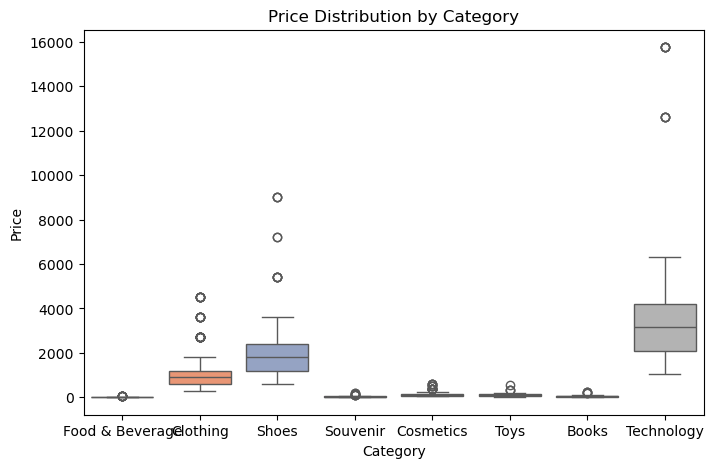

In [109]:
plt.figure(figsize=(8,5))
sns.boxplot(x='category', y='price', data=modified_data, palette='Set2')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

In [111]:
modified_data.to_csv('sales_data_modified.csv', index=False)